In [44]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv", index_col=False) #reading csv raw data
data.head() 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
#data.info

print("The number of rows:", len(data))
print("number of columns:" ,len(data.columns))

The number of rows: 158
number of columns: 12


In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data.isnull().sum()  #

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

-- There are no nulls in the given data frame


<AxesSubplot:>

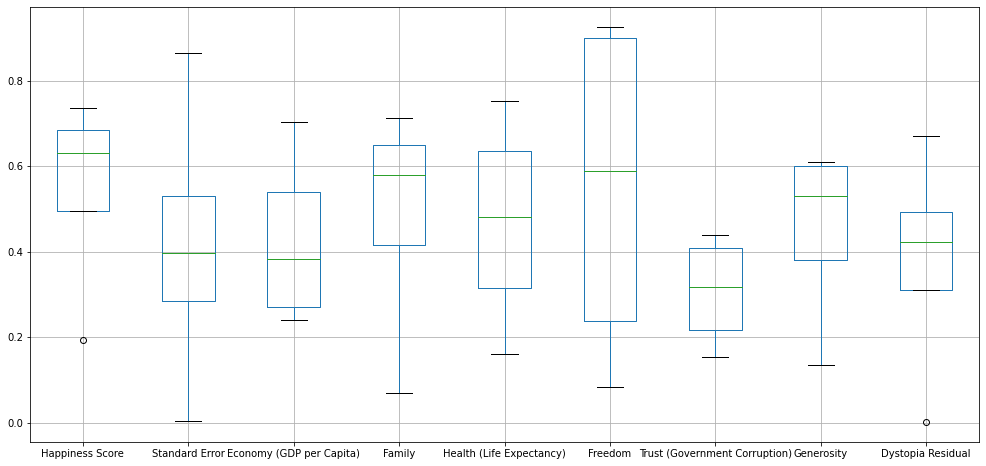

In [6]:
df = pd.DataFrame(data = np.random.random(size=(4,9)), columns = ['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'])
plt.figure(figsize=(17,8)) 
df.boxplot()



-- As we can observe from the graph, column "standard error", "Trust (Government Corruption)" have negligible outliers

In [7]:
a = len(pd.unique(data['Country']))
b = len(pd.unique(data[ 'Region']))
c = len(pd.unique(data['Happiness Rank']))
  
print("No.of.unique countries :",a )
print("No.of.unique Region :",b )
print("No.of.unique Happiness Rank :",c )

No.of.unique countries : 158
No.of.unique Region : 10
No.of.unique Happiness Rank : 157


-- As per the data sheet each country is given with unique "Happiness Rank" but we see that the number of unique countries and unique Happiness Rank does not match. As per our observtion, same "Happiness Rank" is given to two different countries.

In [8]:
# analysing duplicated Happiness Rank
duplicate=data[data.duplicated(['Happiness Rank'], keep=False)]
duplicate


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


-- Country "Jordan" and "Montenegro" has same "Happiness Rank and Happiness Score" but there is a variation in other factors

### univariate analysis :

In [9]:
data[['Country']].value_counts()

Country                
Afghanistan                1
Palestinian Territories    1
Nicaragua                  1
Niger                      1
Nigeria                    1
                          ..
Guinea                     1
Haiti                      1
Honduras                   1
Hong Kong                  1
Zimbabwe                   1
Length: 158, dtype: int64

-- Each country is unique 

In [10]:
data[['Region']].value_counts()

Region                         
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
dtype: int64

-- There are 10 regions(158 countries are grouped into 10 regions)

### bivariate analysis

#### countries in different regions

<AxesSubplot:xlabel='Region'>

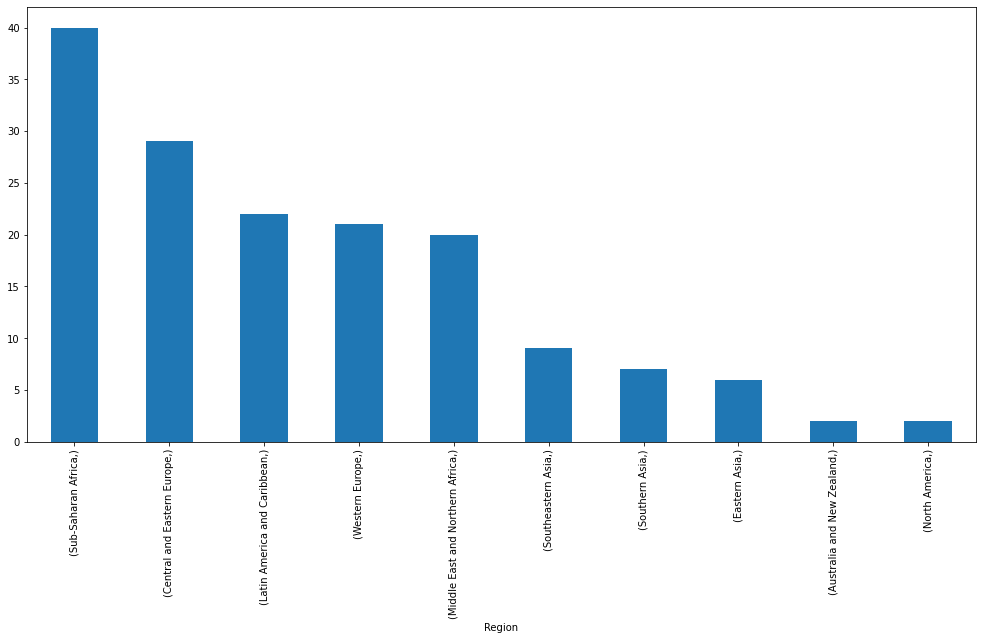

In [11]:
plt.figure(figsize=(17,8)) 
data[['Region']].value_counts().plot(kind="bar")


--- Sub-Saharan Africa  has highest number of countries whereas "North America","Australia and New Zealand" has less number of countries


#### Top 10 countries on basis of Economy (GDP per Capita) 

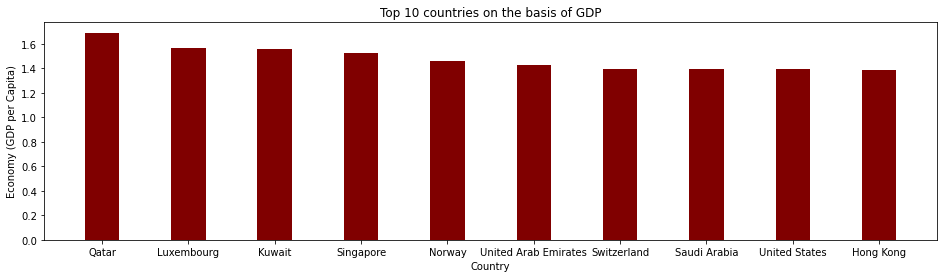

In [12]:
gdp=pd.DataFrame(data[["Country","Economy (GDP per Capita)"]].nlargest(10,"Economy (GDP per Capita)"),index=None)
gdp.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(gdp["Country"],gdp["Economy (GDP per Capita)"] , color ='maroon',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Economy (GDP per Capita)")
plt.title("Top 10 countries on the basis of GDP")
plt.show()

In [143]:
gdp

,Country,Economy (GDP per Capita)
0,Qatar,1.69042
1,Luxembourg,1.56391
2,Kuwait,1.55422
3,Singapore,1.52186
4,Norway,1.45900
5,United Arab Emirates,1.42727
6,Switzerland,1.39651
7,Saudi Arabia,1.39541
8,United States,1.39451
9,Hong Kong,1.38604


---These are the top 10 countries on the basis of GDP and Qatar has highest GDP of 1.69042

#### Top 10 countries on basis of Health (Life Expectancy)

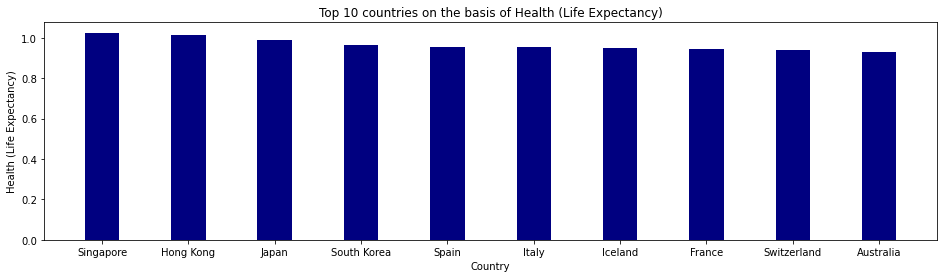

In [13]:
life=pd.DataFrame(data[["Country","Health (Life Expectancy)"]].nlargest(10,"Health (Life Expectancy)"),index=None)
life.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(life["Country"],life["Health (Life Expectancy)"] , color ='navy',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Health (Life Expectancy)")
plt.title("Top 10 countries on the basis of Health (Life Expectancy)")
plt.show()

In [15]:
life

,Country,Health (Life Expectancy)
0,Singapore,1.02525
1,Hong Kong,1.01328
2,Japan,0.99111
3,South Korea,0.96538
4,Spain,0.95562
5,Italy,0.95446
6,Iceland,0.94784
7,France,0.94579
8,Switzerland,0.94143
9,Australia,0.93156


--- As per the observation Singapore has the highest Life Expectancy with value 1.02525

#### Top 10 countries on basis Freedom

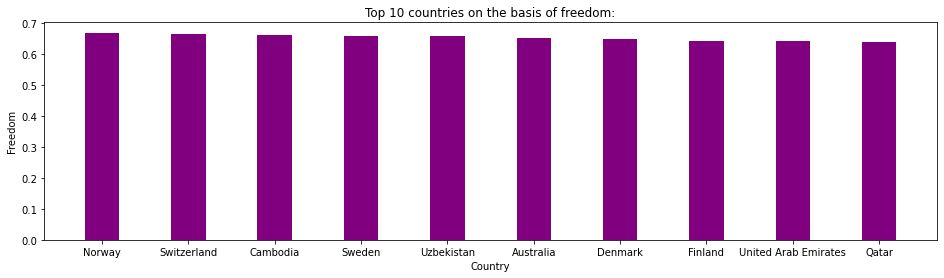

In [16]:
freedom=pd.DataFrame(data[["Country","Freedom"]].nlargest(10,"Freedom"),index=None)
freedom.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(freedom["Country"],freedom["Freedom"] , color ='purple',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Freedom")
plt.title("Top 10 countries on the basis of freedom:")
plt.show()

In [21]:
freedom

,Country,Freedom
0,Norway,0.66973
1,Switzerland,0.66557
2,Cambodia,0.66246
3,Sweden,0.65980
4,Uzbekistan,0.65821
5,Australia,0.65124
6,Denmark,0.64938
7,Finland,0.64169
8,United Arab Emirates,0.64157
9,Qatar,0.64040


--- As per the observation Norway has the highest freedom with value 0.66973

#### Top 10 countries on basis of Trust (Government Corruption)

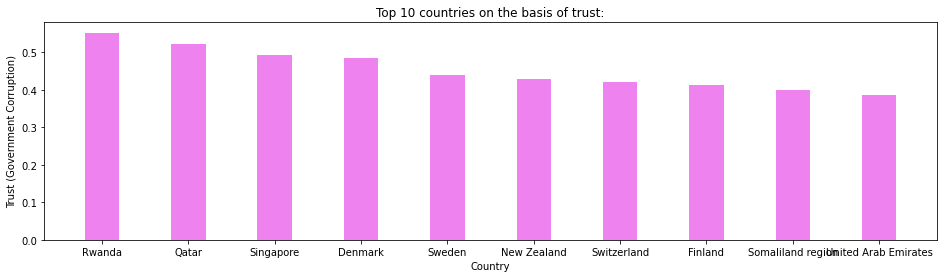

In [19]:
trust=pd.DataFrame(data[["Country","Trust (Government Corruption)"]].nlargest(10,"Trust (Government Corruption)"),index=None)
trust.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(trust["Country"],trust["Trust (Government Corruption)"] , color ='violet',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Trust (Government Corruption)")
plt.title("Top 10 countries on the basis of trust:")
plt.show()

In [20]:
trust

,Country,Trust (Government Corruption)
0,Rwanda,0.55191
1,Qatar,0.52208
2,Singapore,0.49210
3,Denmark,0.48357
4,Sweden,0.43844
5,New Zealand,0.42922
6,Switzerland,0.41978
7,Finland,0.41372
8,Somaliland region,0.39928
9,United Arab Emirates,0.38583


--- As per the observation Rwanda has the highestTrust (Government Corruption) with value 0.55191

#### Top 10 countries on basis of Generosity

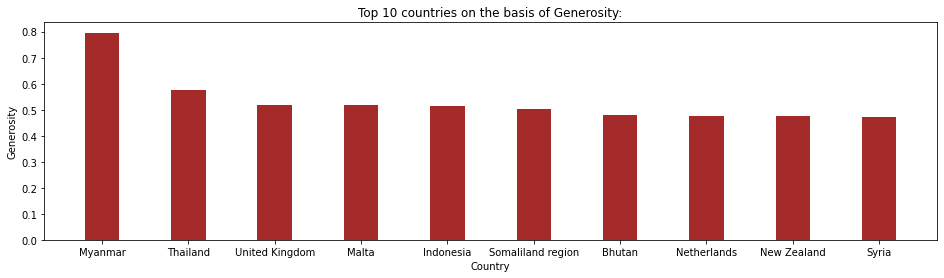

In [22]:
gen=pd.DataFrame(data[["Country","Generosity"]].nlargest(10,"Generosity"),index=None)
gen.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(gen["Country"],gen["Generosity"] , color ='brown',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Generosity")
plt.title("Top 10 countries on the basis of Generosity:")
plt.show()

In [23]:
gen

,Country,Generosity
0,Myanmar,0.79588
1,Thailand,0.57630
2,United Kingdom,0.51912
3,Malta,0.51752
4,Indonesia,0.51535
5,Somaliland region,0.50318
6,Bhutan,0.47998
7,Netherlands,0.47610
8,New Zealand,0.47501
9,Syria,0.47179


--- As per the observation Myanmar has the highest Generosity with value of 0.79588

#### Bottom 10 countries on the basis of Generosity

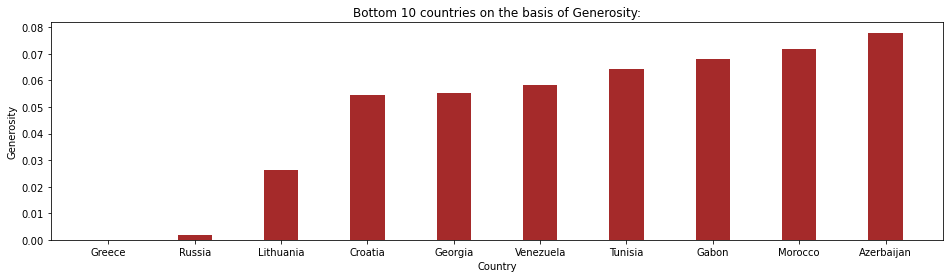

In [40]:
gen1=pd.DataFrame(data[["Country","Generosity"]].nsmallest(10,"Generosity"),index=None)
gen1.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(gen1["Country"],gen1["Generosity"] , color ='brown',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Generosity")
plt.title("Bottom 10 countries on the basis of Generosity:")
plt.show()

In [41]:
gen1

,Country,Generosity
0,Greece,0.00000
1,Russia,0.00199
2,Lithuania,0.02641
3,Croatia,0.05444
4,Georgia,0.05547
5,Venezuela,0.05841
6,Tunisia,0.06431
7,Gabon,0.06822
8,Morocco,0.07172
9,Azerbaijan,0.07799


--- As per the observation for bottom 10 countries we can see that Greece has the least Generosity with value of 0.0

#### Bottom 10 countries on the basis of Trust (Government Corruption)

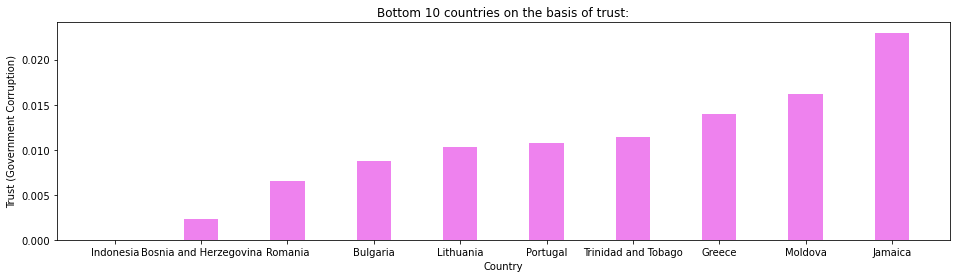

In [42]:
trust1=pd.DataFrame(data[["Country","Trust (Government Corruption)"]].nsmallest(10,"Trust (Government Corruption)"),index=None)
trust1.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(trust1["Country"],trust1["Trust (Government Corruption)"] , color ='violet',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Trust (Government Corruption)")
plt.title("Bottom 10 countries on the basis of trust:")
plt.show()

In [33]:
trust1

,Country,Trust (Government Corruption)
73,Indonesia,0.00000
95,Bosnia and Herzegovina,0.00227
85,Romania,0.00649
133,Bulgaria,0.00872
55,Lithuania,0.01031
87,Portugal,0.01078
40,Trinidad and Tobago,0.01140
101,Greece,0.01397
51,Moldova,0.01615
64,Jamaica,0.02299


---As per the observation for bottom 10 countries we can see that "Indonesia" has the least "Trust (Government Corruption)" with value of 0.0

#### Bottom 10 countries on the basis of Freedom

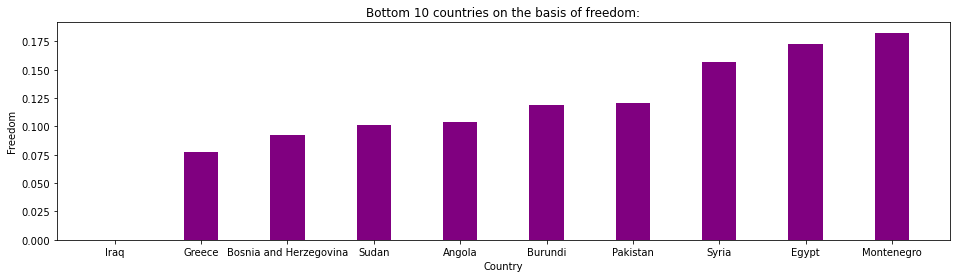

In [34]:
freedom1=pd.DataFrame(data[["Country","Freedom"]].nsmallest(10,"Freedom"),index=None)
freedom1.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(freedom1["Country"],freedom1["Freedom"] , color ='purple',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Freedom")
plt.title("Bottom 10 countries on the basis of freedom:")
plt.show()

In [35]:
freedom1

,Country,Freedom
0,Iraq,0.00000
1,Greece,0.07699
2,Bosnia and Herzegovina,0.09245
3,Sudan,0.10081
4,Angola,0.10384
5,Burundi,0.11850
6,Pakistan,0.12102
7,Syria,0.15684
8,Egypt,0.17288
9,Montenegro,0.18260


---As per the observation for bottom 10 countries we can see that Iraq has the least Freedom with value of 0.0

#### Bottom 10 countries on the basis of Health (Life Expectancy)

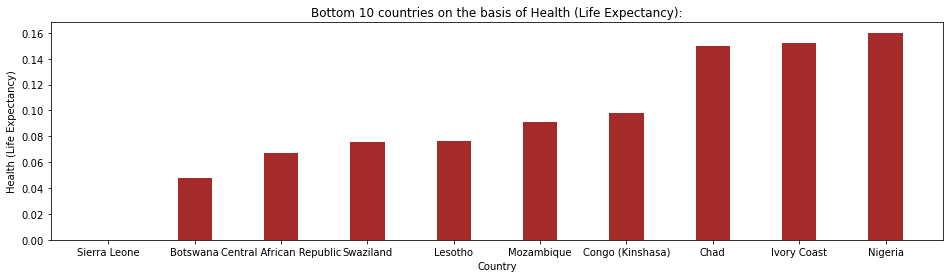

In [36]:
health=pd.DataFrame(data[["Country","Health (Life Expectancy)"]].nsmallest(10,"Health (Life Expectancy)"),index=None)
health.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(health["Country"],health["Health (Life Expectancy)"] , color ='brown',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Health (Life Expectancy)")
plt.title("Bottom 10 countries on the basis of Health (Life Expectancy):")
plt.show()

In [37]:
health

,Country,Health (Life Expectancy)
0,Sierra Leone,0.00000
1,Botswana,0.04776
2,Central African Republic,0.06699
3,Swaziland,0.07566
4,Lesotho,0.07612
5,Mozambique,0.09131
6,Congo (Kinshasa),0.09806
7,Chad,0.15010
8,Ivory Coast,0.15185
9,Nigeria,0.16007


--- As per the observation for bottom 10 countries we can see that Sierra Leone has the least Health (Life Expectancy) with value of 0.0

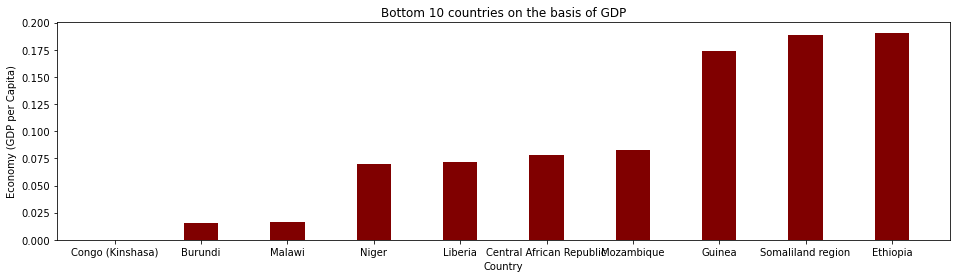

In [38]:
gdp1=pd.DataFrame(data[["Country","Economy (GDP per Capita)"]].nsmallest(10,"Economy (GDP per Capita)"),index=None)
gdp1.reset_index(inplace=True,drop=True)
plt.figure(figsize=(16,4)) 
plt.bar(gdp1["Country"],gdp1["Economy (GDP per Capita)"] , color ='maroon',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("Economy (GDP per Capita)")
plt.title("Bottom 10 countries on the basis of GDP")
plt.show()

In [39]:
gdp1

,Country,Economy (GDP per Capita)
0,Congo (Kinshasa),0.00000
1,Burundi,0.01530
2,Malawi,0.01604
3,Niger,0.06940
4,Liberia,0.07120
5,Central African Republic,0.07850
6,Mozambique,0.08308
7,Guinea,0.17417
8,Somaliland region,0.18847
9,Ethiopia,0.19073


--- As per the observation for bottom 10 countries we can see that "Congo (Kinshasa)" has the least Economy (GDP per Capita) with value of 0.0

<AxesSubplot:>

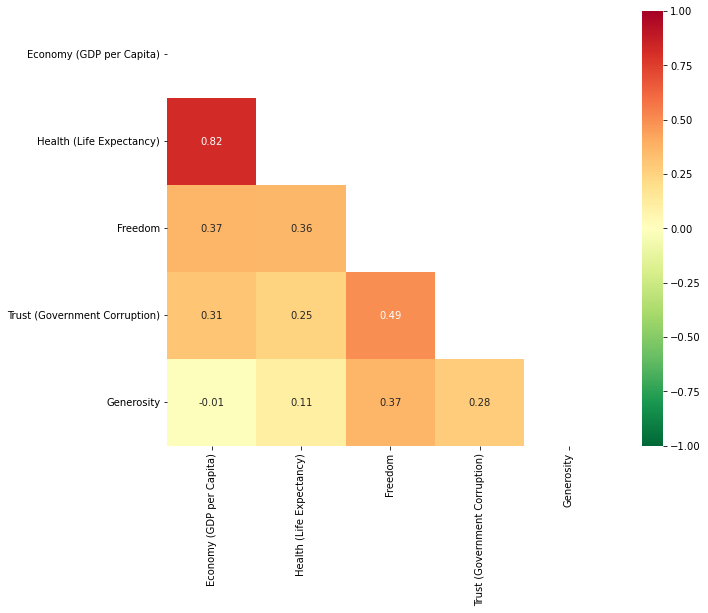

In [63]:
cols= data[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]
plt.figure(figsize=(10, 8))
sns.heatmap(cols.corr(),annot=True,cmap='RdYlGn_r', vmax=1,vmin=-1, center=0, mask=np.triu(np.ones_like(cols.corr())))
                                                                              

* Positive correlation between Economy (GDP per Capita) and Health (Life Expectancy)
* Weak correlation between Economy (GDP per Capita)and Generosity 

<AxesSubplot:>

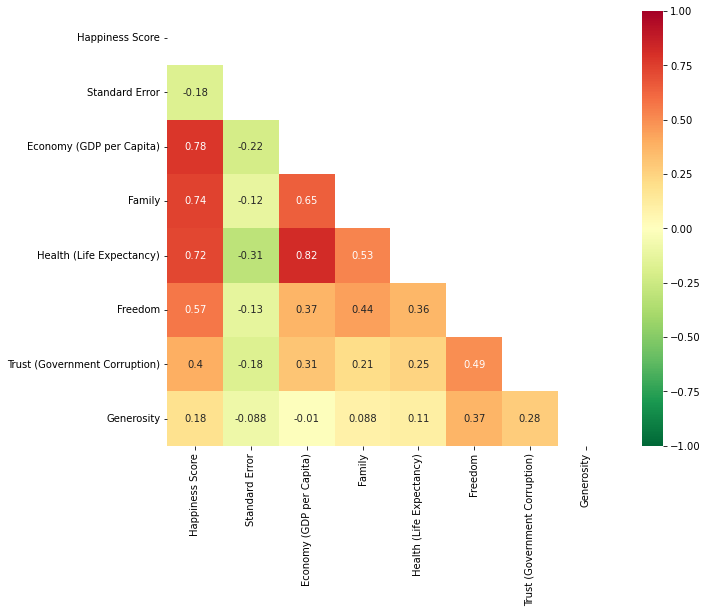

In [81]:
cols= data[['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]
plt.figure(figsize=(10, 8))
sns.heatmap(cols.corr(),annot=True,cmap='RdYlGn_r', vmax=1,vmin=-1, center=0 , mask=np.triu(np.ones_like(cols.corr())))




* Economy (GDP per Capita)', 'Family','Health (Life Expectancy)' are positive corelated with 'Happiness Score'
* Economy (GDP per Capita)'is positive corelated with 'Health (Life Expectancy)'


<AxesSubplot:>

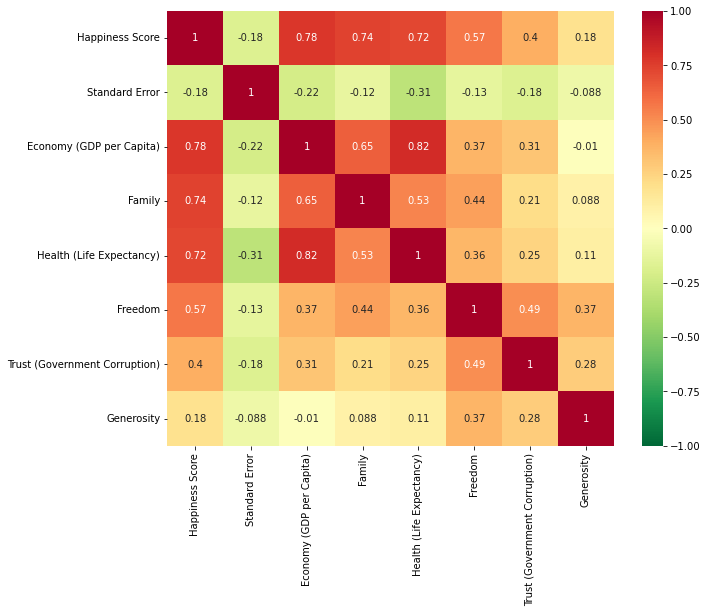

In [82]:
cols= data[['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]
plt.figure(figsize=(10, 8))
sns.heatmap(cols.corr(),annot=True,cmap='RdYlGn_r', vmax=1,vmin=-1, center=0)

In [109]:
dropped_happy = data.drop(["Country", "Happiness Rank","Region" ], axis=1)
dropped_happy

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [110]:
from sklearn.linear_model import LinearRegression
X = dropped_happy.drop("Happiness Score", axis = 1)

lm = LinearRegression()
lm.fit(X, dropped_happy["Happiness Score"])
b = lm.intercept_
b

7.401141772334086e-05

In [111]:
c =lm.coef_
c

array([-1.75982878e-04,  1.00010232e+00,  9.99970526e-01,  9.99877780e-01,
        9.99695750e-01,  9.99915961e-01,  1.00006100e+00,  1.00003081e+00])

In [115]:
coef = zip(X.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Standard Error,-0.000176
1,Economy (GDP per Capita),1.000102
2,Family,0.999971
3,Health (Life Expectancy),0.999878
4,Freedom,0.999696
5,Trust (Government Corruption),0.999916
6,Generosity,1.000061
7,Dystopia Residual,1.000031


We can observe, the variables with their coefficients that affect our dependent variable (happiness score). Using sklearn predict, we can use this model to predict the happiness scores

In [120]:
lm.predict(X)[0:100]

array([7.58687393, 7.56086815, 7.52699615, 7.52215171, 7.42687699,
       7.40600792, 7.37809917, 7.36361297, 7.2859942 , 7.28397913,
       7.27769897, 7.22570406, 7.19980975, 7.18729964, 7.11950016,
       6.98257107, 6.94617825, 6.94021123, 6.9373352 , 6.90131913,
       6.86719525, 6.85292821, 6.8102164 , 6.79772833, 6.78623143,
       6.75011631, 6.6696767 , 6.61123583, 6.57503675, 6.57405107,
       6.50507421, 6.48510122, 6.47677041, 6.45467371, 6.41114035,
       6.32891961, 6.30240062, 6.2981499 , 6.29475955, 6.26924898,
       6.16768713, 6.13015671, 6.12277924, 6.00271517, 5.99509226,
       5.98705183, 5.98374999, 5.97522064, 5.95964277, 5.94818723,
       5.88973648, 5.88900996, 5.87831189, 5.85520207, 5.84765038,
       5.83265937, 5.82827432, 5.82411781, 5.81251728, 5.79059128,
       5.77040957, 5.75860463, 5.75438653, 5.71586271, 5.70884392,
       5.69528734, 5.68873658, 5.60463202, 5.58863928, 5.5481399 ,
       5.47702907, 5.47377359, 5.42855893, 5.39872122, 5.36026

--- We have predicted first 100 countries in our model.